# DLProfile Example using Cosmic Tagger Application

## Set imports and neccessary environment variables

In [79]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [80]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [81]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [82]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [83]:
from src.vanidl import VaniDL
profile = VaniDL()

In [84]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [85]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/benchmark/cosmic/optimization/8MB.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 7328 of 7328 Parsing DXT File 
[============================================================] 100.0% 3855 of 3855 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [86]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/dlio_datasets/cosmic_8MB/img_1_of_1.h5']


In [87]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/dlio_datasets/cosmic_8MB/img_1_of_1.h5',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_23_29_38/nid03824.tensorflow_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_23_29_38/nid03824.trace.json.gz',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_23_29_38/nid03824.input_pipeline.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_23_29_38/nid03824.overview_page.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_23_29_38/nid03824.kernel_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_23_29_38/nid03825.tensorflow_stats.pb',
 '/gpfs/mira-home/dhari/code/dlio_benchmark/scripts/logdir/plugins/profile/2020_07_31_23_29_38/nid03825.overview_page.pb',
 '/gpfs/mira-home/dhari/code/dlio

### Collect the summary of the Application

In [88]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	6.00 seconds
Time spent in I/O		:	0.98 seconds
% Time spent in I/O		:	16.28%
Total Data Accessed		:	1.82 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	1
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	8 bytes and 326432 bytes
	Average			:	313046 bytes
	Median			:	326432 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	449 B/s and 3113 MB/s
	Average			:	1463 MB/s
	Median			:	1557 MB/s
Access Pattern:
	Sequential		:	97.04%
	Consecutive		:	92.89%


Files Summary:
File Types			:	['h5']
Dataset Size:
	Total			:	1.824 GB
	Min,Max			:	0.000 GB and 1.824 GB
	Average			:	0.044 GB


In [89]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 6.0 seconds'


In [90]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 0.9765374999998968 seconds'


### I/O time spent on each file

In [91]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/dlio_datasets/cosmic_8MB/img_1_of_1.h5: 0.98 seconds


### I/O Time spent per rank

In [92]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 0.84 seconds
I/O time for rank 1: 1.01 seconds
I/O time for rank 2: 1.01 seconds
I/O time for rank 3: 0.99 seconds
I/O time for rank 4: 1.01 seconds
I/O time for rank 5: 1.01 seconds
I/O time for rank 6: 1.00 seconds
I/O time for rank 7: 0.94 seconds


In [93]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 1.82 GB'

### I/O performed on each file

In [94]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/dhari/dlio_datasets/cosmic_8MB/img_1_of_1.h5: 1868.29 MB


In [95]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 233.54 MB
I/O performed by rank 1: 233.54 MB
I/O performed by rank 2: 233.54 MB
I/O performed by rank 3: 233.54 MB
I/O performed by rank 4: 233.54 MB
I/O performed by rank 5: 233.54 MB
I/O performed by rank 6: 233.54 MB
I/O performed by rank 7: 233.54 MB


In [96]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'img_1_of_1': 1958984944.0,
 'nid03824.input_pipeline': 1721.0,
 'nid03824.kernel_stats': 0.0,
 'nid03824.overview_page': 2663.0,
 'nid03824.tensorflow_stats': 682.0,
 'nid03824.trace.json': 1219.0,
 'nid03825.input_pipeline': 1721.0,
 'nid03825.kernel_stats': 0.0,
 'nid03825.overview_page': 2663.0,
 'nid03825.tensorflow_stats': 682.0,
 'nid03825.trace.json': 1220.0,
 'nid03826.input_pipeline': 1721.0,
 'nid03826.kernel_stats': 0.0,
 'nid03826.overview_page': 2663.0,
 'nid03826.tensorflow_stats': 682.0,
 'nid03826.trace.json': 1200.0,
 'nid03827.input_pipeline': 1721.0,
 'nid03827.kernel_stats': 0.0,
 'nid03827.overview_page': 2663.0,
 'nid03827.tensorflow_stats': 682.0,
 'nid03827.trace.json': 1219.0,
 'nid03828.input_pipeline': 1721.0,
 'nid03828.kernel_stats': 0.0,
 'nid03828.overview_page': 2663.0,
 'nid03828.tensorflow_stats': 682.0,
 'nid03828.trace.json': 1230.0,
 'nid03829.input_pipeline': 1721.0,
 'nid03829.kernel_stats': 0.0,
 'nid03829.overview_page'

### How application access data over time.

[============================================================] 100.0% 6258 of 6258 Creating Timeline 


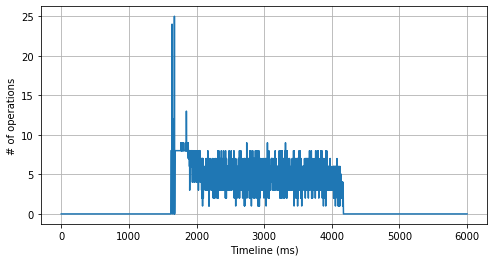

In [97]:
tl = profile.CreateIOTimeline(time_step=0.001)
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);

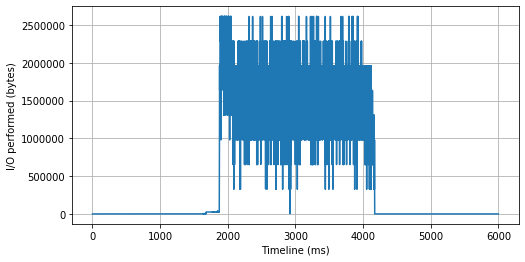

In [98]:
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("I/O performed (bytes)")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 6258 of 6258 Creating Timeline 


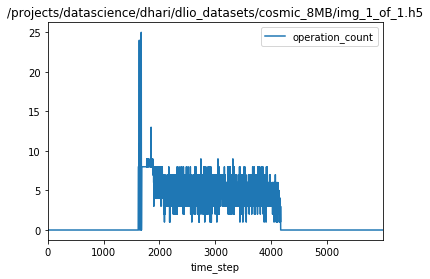

In [99]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 782 of 782 Creating Timeline 


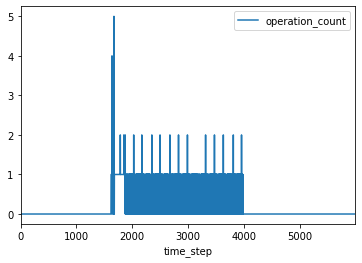

[============================================================] 100.0% 782 of 782 Creating Timeline 


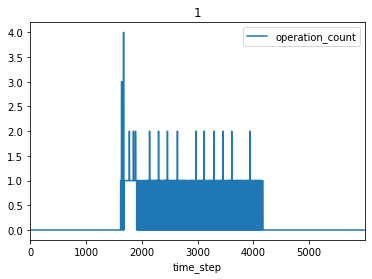

[============================================================] 100.0% 782 of 782 Creating Timeline 


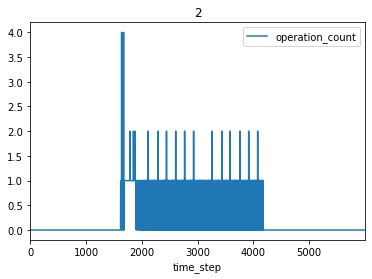

[============================================================] 100.0% 782 of 782 Creating Timeline 


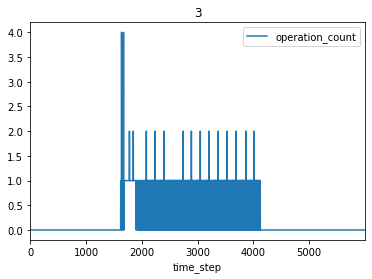

[============================================================] 100.0% 783 of 783 Creating Timeline 


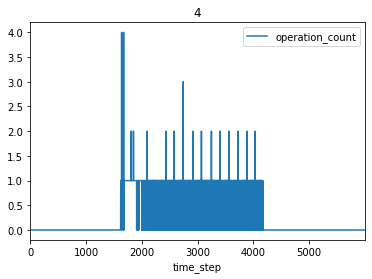

[============================================================] 100.0% 782 of 782 Creating Timeline 


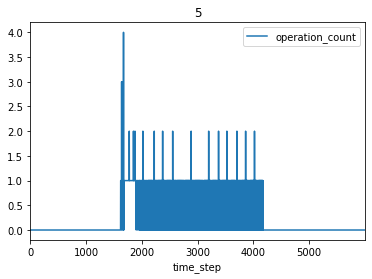

[============================================================] 100.0% 783 of 783 Creating Timeline 


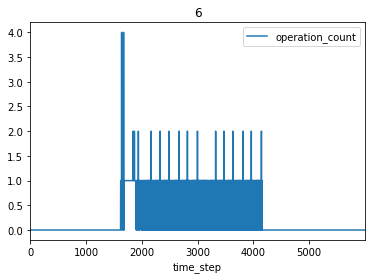

[============================================================] 100.0% 782 of 782 Creating Timeline 


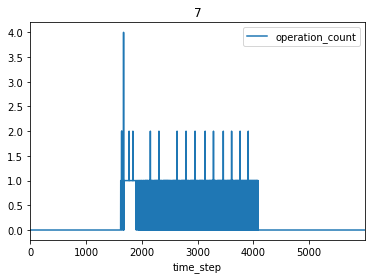

In [100]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

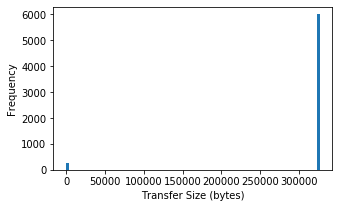

In [101]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3), bins=100);
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

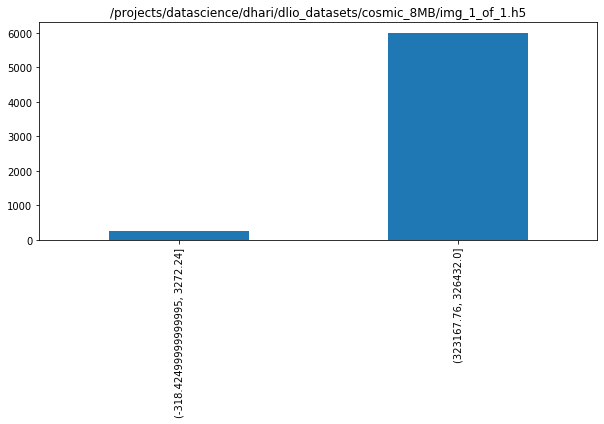

In [102]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

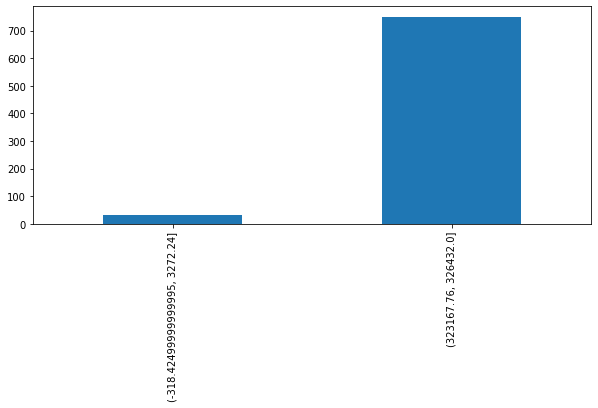

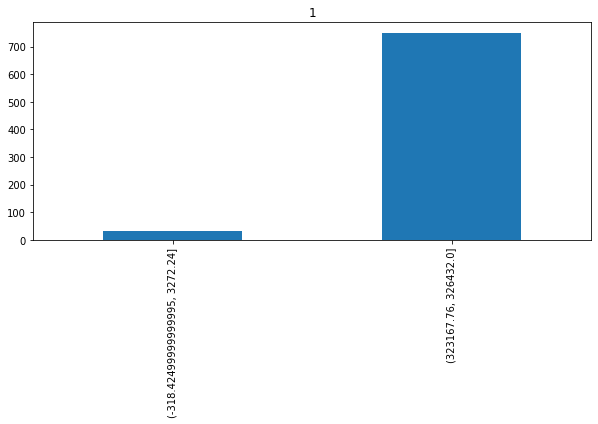

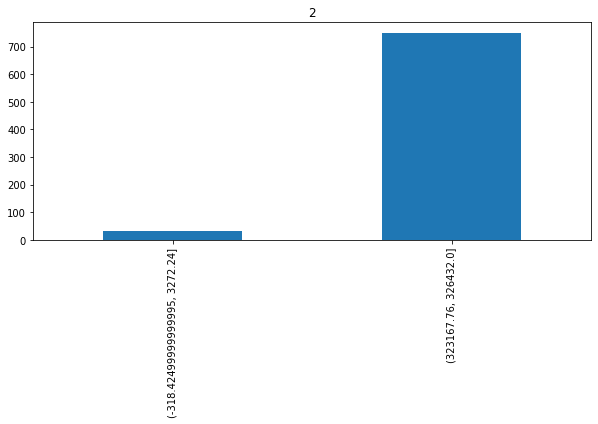

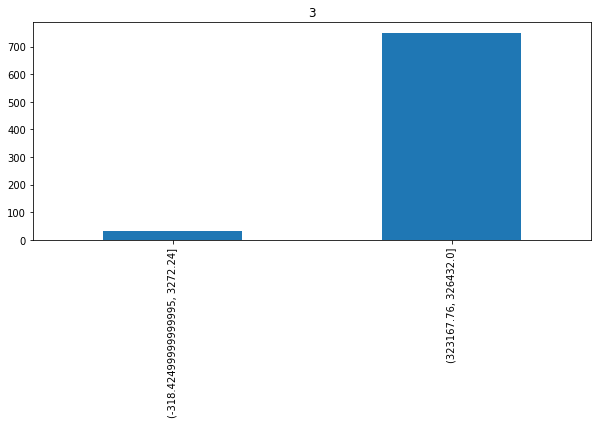

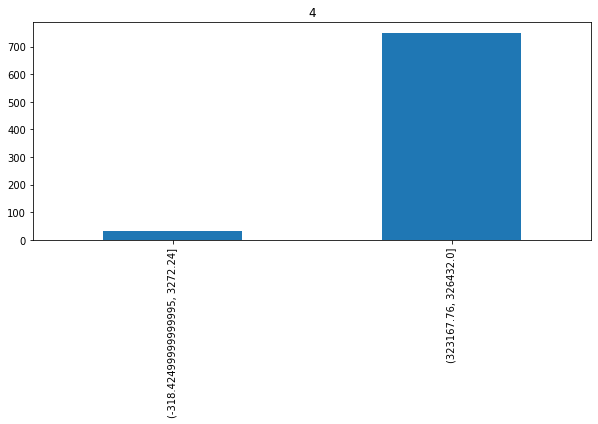

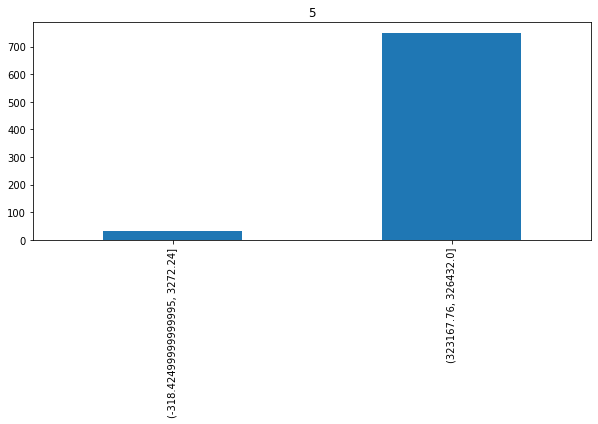

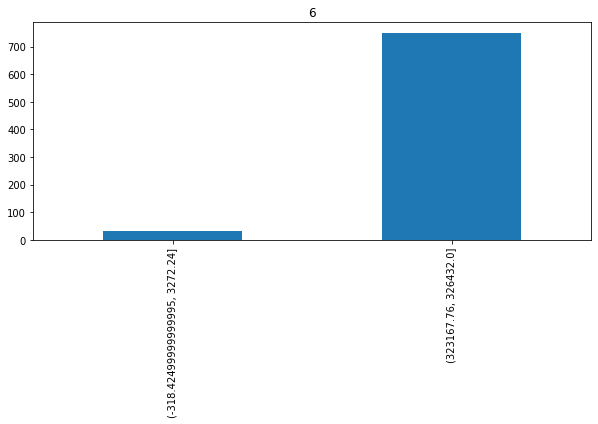

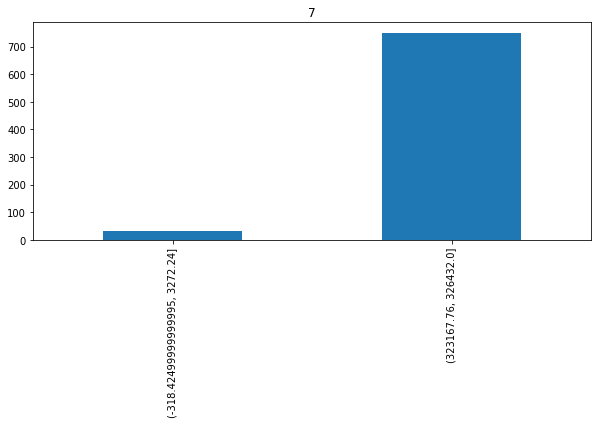

In [103]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [104]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'h5',
 'filename': 'img_1_of_1',
 'io_size': 1959039872,
 'io_time': 0.9765374999998968,
 'path': '/projects/datascience/dhari/dlio_datasets/cosmic_8MB/img_1_of_1.h5',
 'size': 1958984944,
 'special': {'keys': [{'name': 'labels',
                       'obj': <HDF5 dataset "labels": shape (6000,), type "<i8">,
                       'shape': (6000,),
                       'size': 6000,
                       'type': 'dataset'},
                      {'name': 'records',
                       'obj': <HDF5 dataset "records": shape (6000, 202, 202), type "<f8">,
                       'shape': (6000, 202, 202),
                       'size': 244824000,
                       'type': 'dataset'}],
             'name': 'img_1_of_1',
             'type': 'group'}}
